In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [0]:
df = pd.read_csv('/content/drive/Shared drives/257 Project/US_Accidents_May19.csv')

In [5]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [7]:
df.nunique()

ID                       2243939
Source                         3
TMC                           21
Severity                       5
Start_Time               2086185
End_Time                 2079472
Start_Lat                 770318
Start_Lng                 755511
End_Lat                   219390
End_Lng                   221979
Distance(mi)               11972
Description              1253507
Number                     32326
Street                    136834
Side                           3
City                       11077
County                      1682
State                         49
Zipcode                   297430
Country                        1
Timezone                       4
Airport_Code                1895
Weather_Timestamp         363617
Temperature(F)               768
Wind_Chill(F)                899
Humidity(%)                   97
Pressure(in)                 310
Visibility(mi)                67
Wind_Direction                18
Wind_Speed(mph)               88
Precipitat

In [8]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


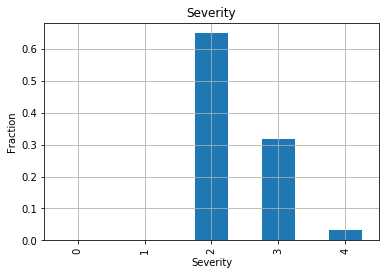

In [9]:
df.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

In [10]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 134798 non one hot metadata rows, which are 6.0% of the data


In [0]:
bools = booldf.sum(axis=0)

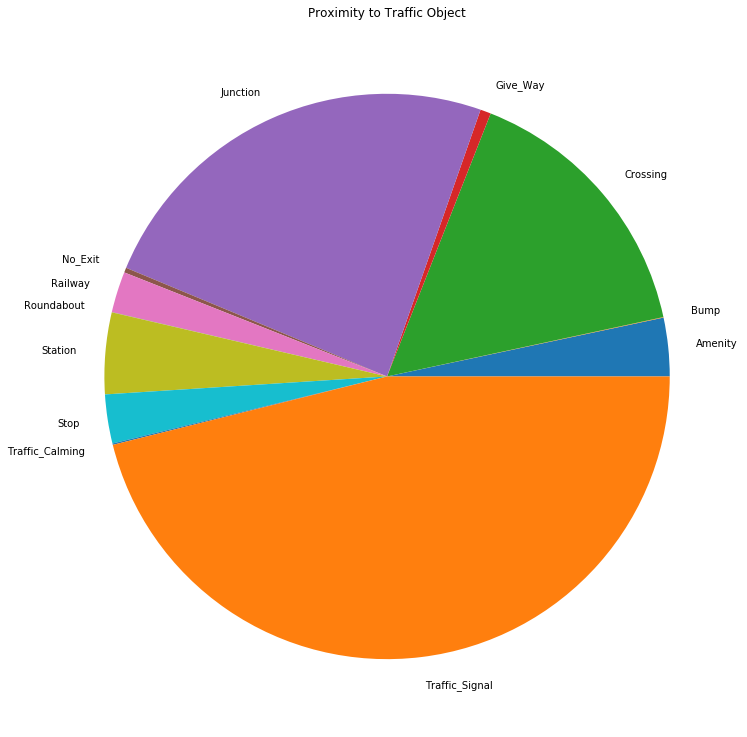

In [12]:
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

In [0]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

top 20 accident durations correspond to 96.1% of the data


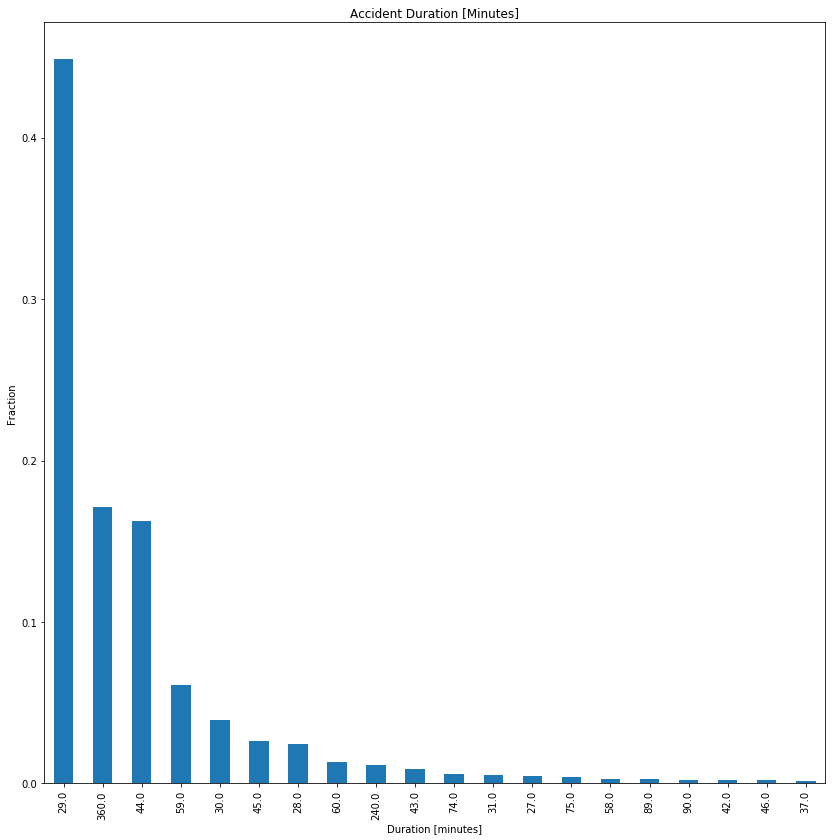

In [14]:
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,14))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

In [15]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


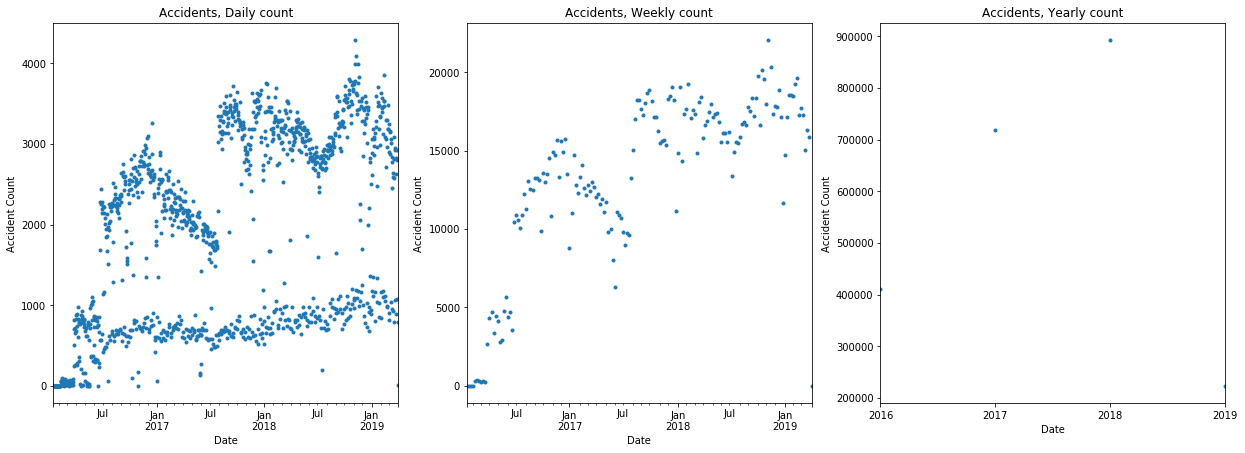

In [16]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

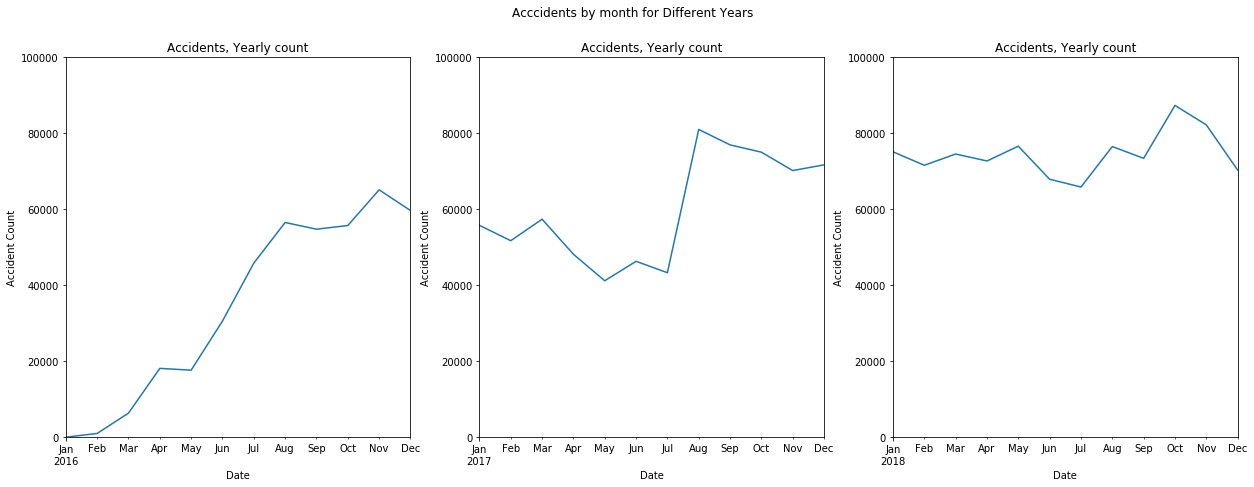

In [17]:
years = ['2016','2017','2018']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Acccidents by month for Different Years')
plt.xlabel('month')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    plt.subplot(1,3,i)
    sample = df.loc[year].ID.resample('M').count()
    sample.plot()
    plt.ylim(0,100000)
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

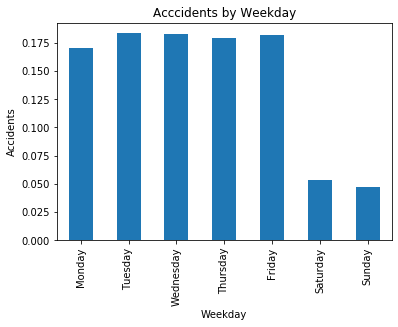

In [18]:
df['Weekday'] = df.index.weekday_name
weekday = df.groupby('Weekday').ID.count()
weekday = weekday/weekday.sum()
dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday[dayOfWeek].plot.bar()
plt.title('Acccidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Accidents');

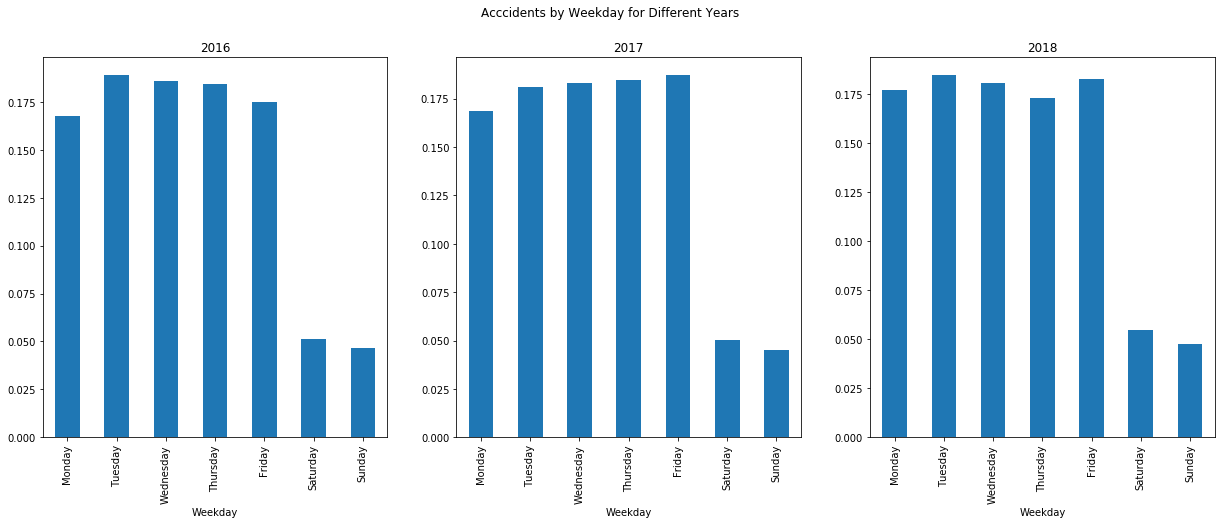

In [19]:
years = ['2016','2017','2018']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Acccidents by Weekday for Different Years')
plt.xlabel('Weekday')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    weekday = df.loc[year].groupby('Weekday').ID.count()
    weekday = weekday/weekday.sum()
    dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    plt.subplot(1,3,i)
    plt.title(year)
    weekday[dayOfWeek].plot.bar()

In [0]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix, fontsize=15')
    plt.show()

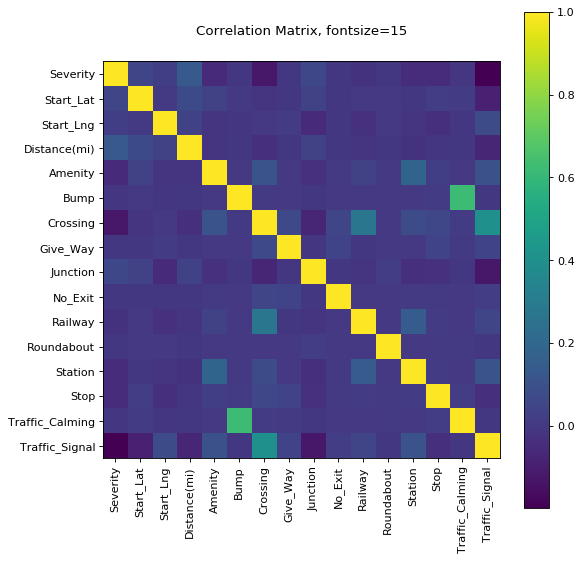

In [21]:
plotCorrelationMatrix(df, 8)

In [0]:
df1 = df

In [23]:
df1.isnull().sum()

ID                             0
Source                         0
TMC                       516762
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1727177
End_Lng                  1727177
Distance(mi)                   0
Description                    1
Number                   1458402
Street                         0
Side                           0
City                          68
County                         0
State                          0
Zipcode                      646
Country                        0
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           442954
Precipitat

In [24]:
df1.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Monday
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,Monday
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,Monday
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,Monday
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Monday


In [0]:
df1 = df1.drop(['Distance(mi)', 'TMC', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [26]:
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Number,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,NaN,US/Eastern,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Monday
2016-02-08 06:07:59,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,2584.0,US/Eastern,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Monday
2016-02-08 06:49:27,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,NaN,US/Eastern,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Monday
2016-02-08 07:23:34,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,NaN,US/Eastern,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Monday
2016-02-08 07:39:07,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,NaN,US/Eastern,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Monday


In [0]:
cols = ["End_Lat", "End_Lng", "Number"]
df1 = df1.drop(cols, axis=1)

In [28]:
df1.isnull().sum()

ID                         0
Source                     0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
Timezone                2141
Weather_Timestamp      47170
Temperature(F)         62265
Wind_Chill(F)        1852370
Humidity(%)            64467
Pressure(in)           57280
Visibility(mi)         71360
Wind_Direction         47190
Wind_Speed(mph)       442954
Precipitation(in)    1979466
Weather_Condition      72004
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Turning_Loop               0
Sunrise_Sunset            78
Weekday                    0
dtype: int64

In [0]:
pmean = df1['Pressure(in)'].mean()
tmean = df1['Temperature(F)'].mean()
wcmean = df1['Wind_Chill(F)'].mean()
hmean = df1['Humidity(%)'].mean()
wsmean = df1['Wind_Speed(mph)'].mean()
prmean = df1['Precipitation(in)'].mean()

In [0]:
df1['Pressure(in)']=df1['Pressure(in)'].fillna(pmean)

In [0]:
df1['Temperature(F)'] = df1['Temperature(F)'].fillna(tmean)

In [0]:
df1['Wind_Chill(F)'] = df1['Wind_Chill(F)'].fillna(wcmean)

In [0]:
df1['Humidity(%)'] = df1['Humidity(%)'].fillna(hmean)

In [0]:
df1['Wind_Speed(mph)'] = df1['Wind_Speed(mph)'].fillna(wsmean)

In [0]:
df1['Precipitation(in)']=df1['Precipitation(in)'].fillna(prmean)

In [36]:
df1.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Timezone              2141
Weather_Timestamp    47170
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)       71360
Wind_Direction       47190
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    72004
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset          78
Weekday                  0
dtype: int64

In [37]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Timezone', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Weekday'],
      dtype='object')

In [0]:
visMode = df1["Visibility(mi)"].mode()
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)

In [0]:
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)
df1['Visibility(mi)'] = df1['Visibility(mi)'].fillna(df1['Visibility(mi)'].mode()[0])
df1['Wind_Direction'] = df1['Wind_Direction'].fillna(df1['Wind_Direction'].mode()[0])
df1['Weather_Condition'] = df1['Weather_Condition'].fillna(df1['Weather_Condition'].mode()[0])
df1['Sunrise_Sunset'] = df1['Sunrise_Sunset'].fillna(df1['Sunrise_Sunset'].mode()[0])

In [0]:
df1.drop(['Timezone','Weather_Timestamp', 'Start_Time', 'End_Time', 'ID', 'Source'], axis = 1, inplace = True)

In [0]:
df1.dropna(axis=0, inplace=True)

In [42]:
df1.isnull().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
Weekday              0
dtype: int64

In [43]:
df1.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Weekday'],
      dtype='object')

In [44]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.head()


,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,3,39.865147,-84.058723,36.9,26.042067,91.0,29.68,10.0,Calm,8.844042,0.020000,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:07:59,2,39.928059,-82.831184,37.9,26.042067,100.0,29.65,10.0,Calm,8.844042,0.000000,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:49:27,2,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,SW,3.500000,0.060439,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0,Night,Monday
2016-02-08 07:23:34,3,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,SW,4.600000,0.060439,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 07:39:07,2,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,SW,3.500000,0.060439,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,1,0,Day,Monday


In [45]:
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1['Weekday'] = label_encoder.fit_transform(df1['Weekday'])
df1.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,3,39.865147,-84.058723,36.9,26.042067,91.0,29.68,10.0,0,8.844042,0.020000,31,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:07:59,2,39.928059,-82.831184,37.9,26.042067,100.0,29.65,10.0,0,8.844042,0.000000,31,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:49:27,2,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,12,3.500000,0.060439,42,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2016-02-08 07:23:34,3,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,12,4.600000,0.060439,41,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 07:39:07,2,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,12,3.500000,0.060439,41,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [0]:
Y = df1['Severity']

In [0]:
X = df1.drop(['Severity'], axis = 1)


In [48]:
X.head()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,39.865147,-84.058723,36.9,26.042067,91.0,29.68,10.0,0,8.844042,0.020000,31,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:07:59,39.928059,-82.831184,37.9,26.042067,100.0,29.65,10.0,0,8.844042,0.000000,31,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:49:27,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,12,3.500000,0.060439,42,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2016-02-08 07:23:34,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,12,4.600000,0.060439,41,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 07:39:07,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,12,3.500000,0.060439,41,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.3, random_state=120)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-0.026363,0.729445,-1.488381,0.000650,1.043413,0.603417,-0.051168,-1.394545,-0.000150,-0.329980,0.285665,-0.108126,-0.010281,-0.239415,-0.045919,-0.302061,-0.031041,-0.089874,-0.007939,-0.128117,-0.098919,-0.016139,-0.436157,0.0,-0.601889,-0.972016
1,0.198459,-1.594814,-0.212470,0.000650,0.998175,-0.307872,0.289430,1.029710,-0.965748,-0.000332,0.893011,-0.108126,-0.010281,-0.239415,-0.045919,3.310592,-0.031041,-0.089874,-0.007939,-0.128117,-0.098919,-0.016139,-0.436157,0.0,1.661437,0.832511
2,0.256386,-1.563456,-0.223058,0.000650,0.138661,-0.900210,0.289430,0.683388,0.080837,-0.000332,0.893011,-0.108126,-0.010281,-0.239415,-0.045919,-0.302061,-0.031041,-0.089874,-0.007939,-0.128117,-0.098919,-0.016139,-0.436157,0.0,1.661437,-0.972016
3,1.149508,0.405981,-1.710739,-1.213202,0.410086,0.831239,-0.391766,-0.701901,0.604129,-0.395336,0.842399,-0.108126,-0.010281,-0.239415,-0.045919,-0.302061,-0.031041,-0.089874,-0.007939,-0.128117,-0.098919,-0.016139,2.292755,0.0,-0.601889,-0.972016
4,-0.543418,0.616047,-0.429534,0.000650,1.541027,0.421159,-2.946250,-1.394545,-0.000150,-0.000332,-1.030249,-0.108126,-0.010281,4.176850,-0.045919,-0.302061,-0.031041,-0.089874,-0.007939,-0.128117,-0.098919,-0.016139,2.292755,0.0,1.661437,-1.423147


In [0]:
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [0]:
clf = DecisionTreeClassifier(random_state = 120, criterion="entropy", max_depth=4)


In [0]:
clf = clf.fit(scalar_train,y_train)

In [0]:
y_pred = clf.predict(scalar_test)

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6556696406023929


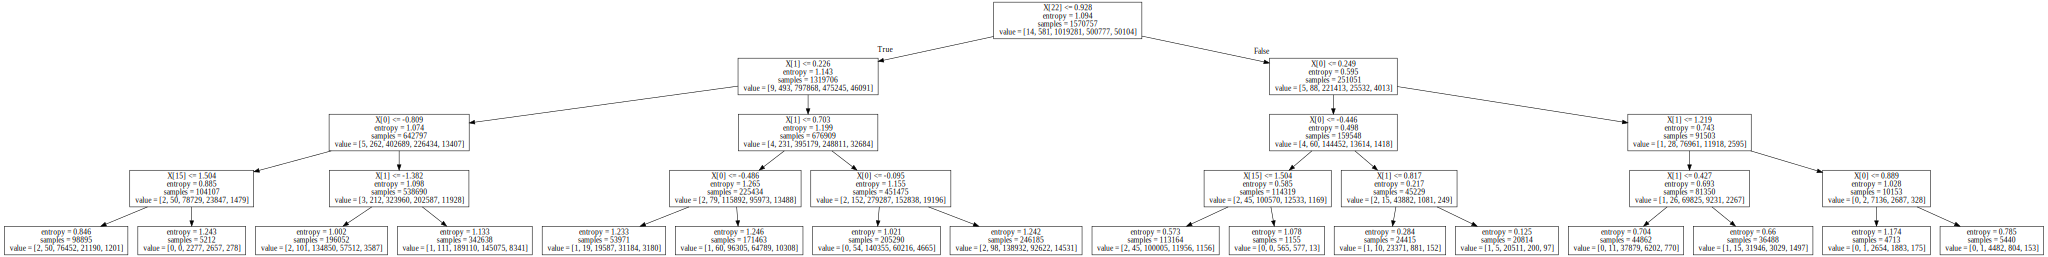

In [57]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(clf, out_file="mytree_entropy.dot")
with open("mytree_entropy.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-1.823372,0.718612,0.999418,0.000116,-0.267814,-0.471033,0.290278,0.855314,1.637400,0.00036,-1.182222,-0.108364,-0.00987,-0.239696,-0.045793,-0.301930,-0.031408,-0.090338,-0.007313,-0.12805,-0.098867,-0.016335,-0.436333,0.0,-0.601535,0.832412
1,-1.384430,-0.026756,0.464433,0.000116,0.320330,-0.822178,0.290278,0.855314,0.599534,0.00036,0.892781,-0.108364,-0.00987,-0.239696,-0.045793,-0.301930,-0.031408,-0.090338,-0.007313,-0.12805,-0.098867,-0.016335,-0.436333,0.0,-0.601535,0.832412
2,-0.491095,-1.336731,-0.224162,0.000116,0.953716,0.626295,-2.097397,-1.395405,0.000289,0.00036,0.842171,-0.108364,-0.00987,-0.239696,-0.045793,3.312023,-0.031408,-0.090338,-0.007313,-0.12805,-0.098867,-0.016335,-0.436333,0.0,-0.601535,0.381159
3,1.735474,0.090863,0.300229,0.000116,1.225167,-1.524468,0.290278,-0.876008,0.351349,0.00036,0.842171,-0.108364,-0.00987,-0.239696,-0.045793,-0.301930,-0.031408,-0.090338,-0.007313,-0.12805,-0.098867,-0.016335,-0.436333,0.0,-0.601535,-1.423852
4,-0.534150,0.784321,1.407278,0.000116,-0.177330,0.143470,0.290278,0.335917,-0.686516,0.00036,1.145831,-0.108364,-0.00987,-0.239696,-0.045793,-0.301930,-0.031408,-0.090338,-0.007313,-0.12805,-0.098867,-0.016335,-0.436333,0.0,-0.601535,-0.070094


In [0]:
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf=RandomForestClassifier(n_estimators=200)

In [63]:
clf.fit(scalar_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=clf.predict(scalar_test)

In [0]:
from sklearn import metrics

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7363135080854806


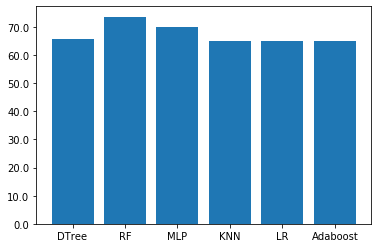

In [67]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(6)
accuracy = [65.56, 73.63, 69.8, 65, 65, 65.12]


def millions(x, pos):
    'The two args are the value and tick position'
    return (x )


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, accuracy)
plt.xticks(x, ('DTree', 'RF', 'MLP', 'KNN', 'LR', 'Adaboost'))
plt.show()